In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Corrected Import
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Define the path to the Excel file (Ensure the correct file name)
file_path = r"C:\Users\Viditi08\Desktop\Churn Analysis\Prediction File\churn_data.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'

# Read the data from the specified sheet
try:
    data = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl')
    print("Data Loaded Successfully!")
except Exception as e:
    print(f"Error: {e}")

# Display the first few rows of the fetched data
print(data.head())




Data Loaded Successfully!
  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   12728-AND  Female   28     Yes  Andhra Pradesh                    2   
1   12736-ASS  Female   62      No           Assam                   10   
2   12739-HAR    Male   57     Yes         Haryana                    1   
3   12746-WES    Male   53      No     West Bengal                    7   
4   12752-RAJ  Female   30      No       Rajasthan                    4   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                13        NaN           Yes            Yes  ...   
1                 3        NaN           Yes             No  ...   
2                31        NaN           Yes            Yes  ...   
3                17        NaN           Yes             No  ...   
4                17        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card      80.300003    324.200012  

In [8]:
#Data Preprocessing

# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

 

# List of columns to be label encoded

columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method'

]

 

# Encode categorical variables except the target variable

label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    data[column] = label_encoders[column].fit_transform(data[column])

 

# Manually encode the target variable 'Customer_Status'

data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

 

# Split data into features and target

X = data.drop('Customer_Status', axis=1)

y = data['Customer_Status']

 

# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

 

# Train the model

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Confusion Matrix:
[[806  50]
 [119 227]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       856
           1       0.82      0.66      0.73       346

    accuracy                           0.86      1202
   macro avg       0.85      0.80      0.82      1202
weighted avg       0.86      0.86      0.85      1202



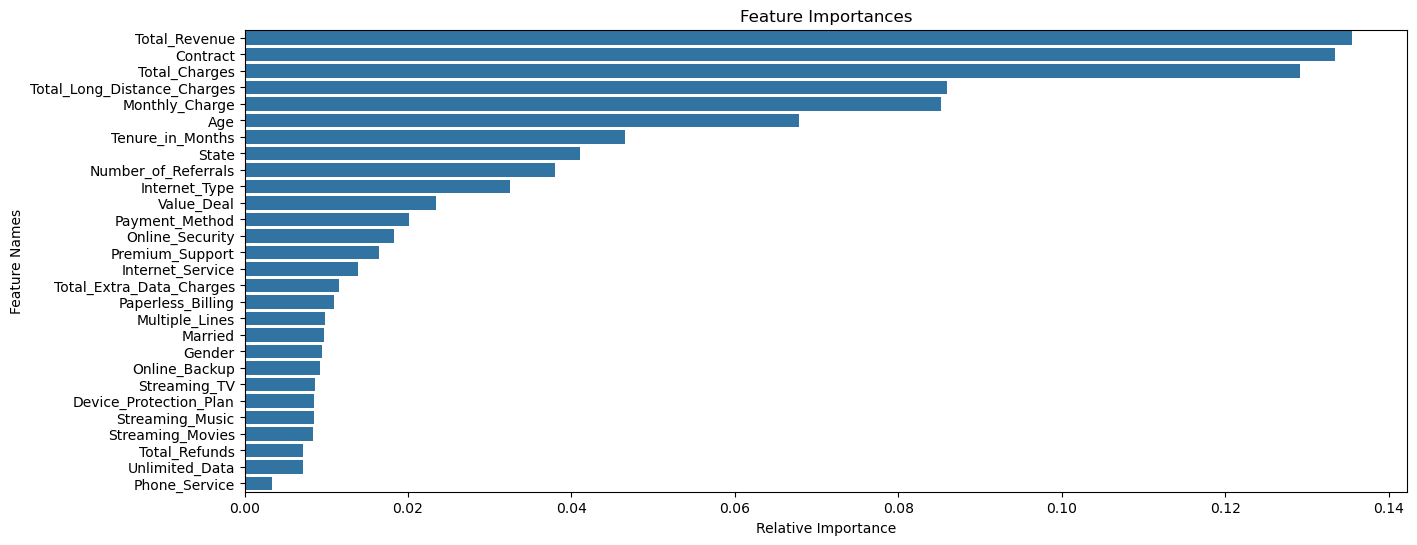

In [14]:
#Evaluate Model

# Make predictions

y_pred = rf_model.predict(X_test)

 

# Evaluate the model

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))

 

# Feature Selection using Feature Importance

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

 

# Plot the feature importances

plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()


In [18]:
# Define the path to the Joiner Data Excel file
file_path = r"C:\Users\Viditi08\Desktop\Churn Analysis\Prediction File.xlsx"

 

# Define the sheet name to read data from

sheet_name = 'vw_JoinData'

 

# Read the data from the specified sheet into a pandas DataFrame

new_data = pd.read_excel(file_path, sheet_name=sheet_name)

 

# Display the first few rows of the fetched data

print(new_data.head())

 

# Retain the original DataFrame to preserve unencoded columns

original_data = new_data.copy()

 

# Retain the Customer_ID column

customer_ids = new_data['Customer_ID']

 

# Drop columns that won't be used for prediction in the encoded DataFrame

new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

 

# Encode categorical variables using the saved label encoders

for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])

 

# Make predictions

new_predictions = rf_model.predict(new_data)

 

# Add predictions to the original DataFrame

original_data['Customer_Status_Predicted'] = new_predictions

 

# Filter the DataFrame to include only records predicted as "Churned"

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

 

# Save the results

original_data.to_csv(r"C:\Users\Viditi08\Desktop\Churn Analysis\prediction.csv", index=False)

  Customer_ID  Gender  Age Married          State  Number_of_Referrals  \
0   16733-ODI  Female   76     Yes         Odisha                   10   
1   16764-WES    Male   40      No    West Bengal                   15   
2   18027-UTT  Female   58     Yes  Uttar Pradesh                   15   
3   19539-PUN  Female   37     Yes         Punjab                   14   
4   19541-ODI  Female   37     Yes         Odisha                   15   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 1        NaN           Yes             No  ...   
1                13     Deal 5           Yes             No  ...   
2                30     Deal 5           Yes             No  ...   
3                 8     Deal 5           Yes             No  ...   
4                14     Deal 5           Yes             No  ...   

  Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0    Credit Card      45.849998     45.849998           0.0   
1    Credit Card    